In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import check_output

In [2]:
x_l = np.load('X.npy')
y_l = np.load('Y.npy')


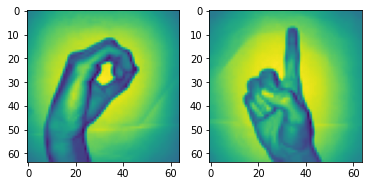

In [3]:
img_size = 64
plt.subplot(1,2,1)
plt.imshow(x_l[260].reshape(img_size, img_size))
#plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(x_l[900].reshape(img_size,img_size))
#plt.axis('off')

plt.show()
%matplotlib inline


In [8]:
# from 0 to 204 is zero sign and from 205 to 410 is one sign 
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # 3 dimensional input array.
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate( (z,o), axis=0).reshape(X.shape[0],1) # 2D ( flatten )
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

X shape: (410, 64, 64)
Y shape: (410, 1)


In [12]:
from sklearn.model_selection import train_test_split
# Now we have 3 dimensional input array (X) 
# so we need to make it flatten (2D) in order to use as input for our first deep learning model.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

X_train_flattern = X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2])
X_test_flattern = X_test.reshape(number_of_test, X_test.shape[1]*X_test.shape[2])
print("X train flattern: ", X_train_flattern.shape)
print("X test flattern: " ,X_test_flattern.shape)



X train flattern:  (348, 4096)
X test flattern:  (62, 4096)


In [13]:
x_train, x_test, y_train, y_test = X_train_flattern.T, X_test_flattern.T , Y_train.T, Y_test.T 

print(y_train.shape)
print(y_test)

(1, 348)
[[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
  0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]]


In [14]:
# başlangıç aşamasında ki ağırlık ve bias'ı tanımladık.
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01) # dimension sayısı kaç ise sütun ve satır oluşturacak.
    b = 0.0
    return w, b

w,b = initialize_weights_and_bias(4096)

z = np.dot(w.T, x_train)+b
def sigmoid(z):
    y_head = 1 / ( 1 + np.exp(-z) )
    return y_head

y_head = sigmoid(0)
y_head



Cost after iteration 0: 14.014222
Cost after iteration 10: 1.918535
Cost after iteration 20: 1.750365
Cost after iteration 30: 1.653524
Cost after iteration 40: 1.560956
Cost after iteration 50: 1.457745
Cost after iteration 60: 1.335495
Cost after iteration 70: 1.191800
Cost after iteration 80: 1.027511
Cost after iteration 90: 0.843100
Cost after iteration 100: 0.639890
Cost after iteration 110: 0.432595
Cost after iteration 120: 0.278192
Cost after iteration 130: 0.221609
Cost after iteration 140: 0.208972
Cost after iteration 150: 0.203415
Cost after iteration 160: 0.198754
Cost after iteration 170: 0.194446
Cost after iteration 180: 0.190433
Cost after iteration 190: 0.186683


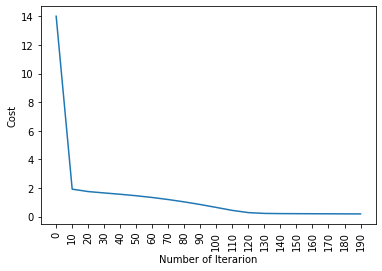

In [15]:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost 

# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    return parameters, gradients, cost_list

parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)
%matplotlib inline


In [19]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),

    for i in range(z.shape[1]):

        if z[0,i]<= 0.5: 
            Y_prediction[0,i] = 0
        else: 
            Y_prediction[0,i] = 1

    return Y_prediction
my_prediction = predict(parameters["weight"],parameters["bias"],x_test)
print(x_test.shape) 
print(my_prediction)

(4096, 62)
[[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
  0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]]
